<a href="https://colab.research.google.com/github/cooljayza/Deep-Learning-Indaba-2024/blob/main/Computer_Visioin_Deep_Learning_Indaba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Indaba: Computer Vision


## What is computer vision?

Computer vision is a type of artificial intelligence (AI) that allows computers to process visual information, like images and videos, to identify and understand objects and people. The goal of computer vision is to replicate how humans see and understand the world around them.

## Deep Learning and Computer Vision


### Intro to deep learning


**Machine Learning**
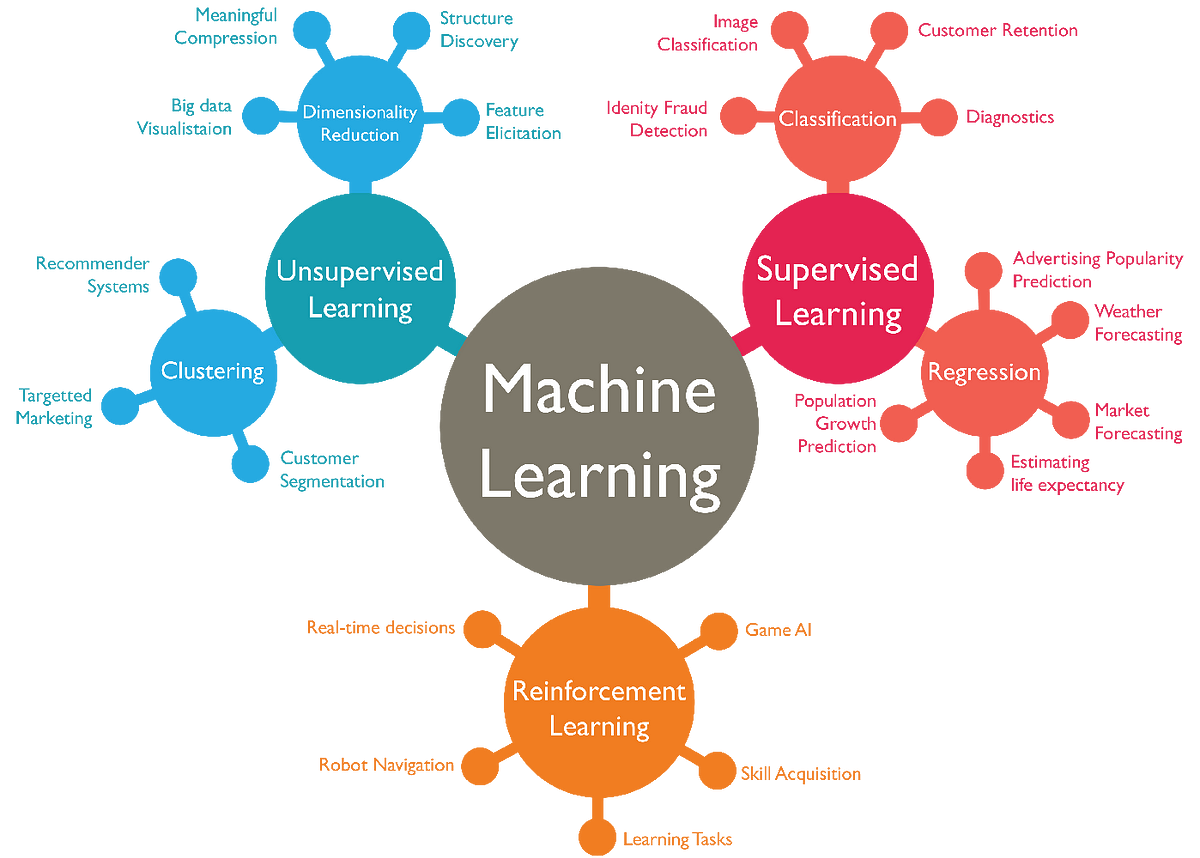


**What is deep learning?**

Deep learning is a type of machine learning that uses artificial neural networks to teach computers to perform tasks like humans


652ebc26fbd9a45bcec81819_Deep_Learning_vs_Machine_Learning_3033723be2.avif


### Architectures of Neural Networks for Computer Vision


**Convolutional neural networks (CNNs)**

A type of deep learning algorithm that uses a series of operations to capture spatial relationships between pixels in an image. CNNs are often used in computer vision applications, such as self-driving cars.

**Generative adversarial networks (GANs)**

A type of neural network that can be used to generate realistic images. GANs are often used in image synthesis and computer vision.
GoogLeNet
A convolution layer that uses many convolution processes of varying sizes to produce dense data. GoogLeNet also uses sparse connections to eliminate redundant data.


**Long short-term memory (LSTM)**


A type of recurrent neural network that is used to make predictions based on time series data. LSTM is an extension of the standard RNN architecture that solves the issue of vanishing gradients.


**ResNet**


A standard neural network used for extensive computer vision works. ResNet50 is a model that can use transfer learning to form a complete caption of an image.


**Feedforward neural networks**
A classical neural network architecture where data is transmitted strictly in one direction, from inputs to outputs.

**And many more...**

To see a friendly explaination of mores architures follow this [link](https://www.v7labs.com/blog/deep-learning-guide)

### Computer Vision Tasks

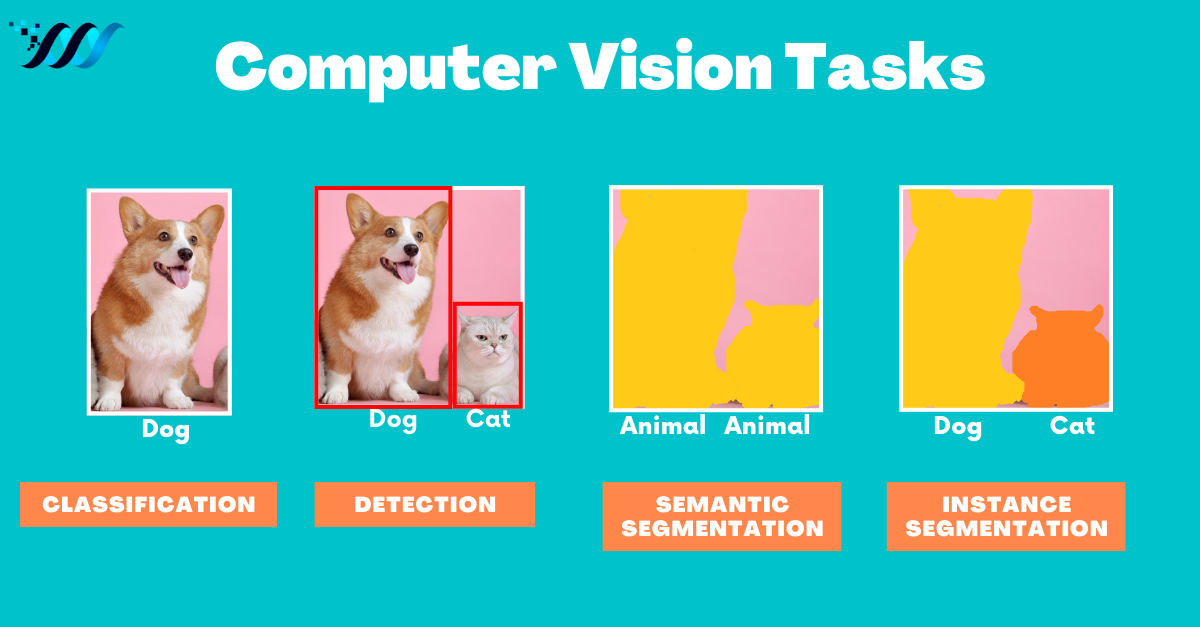

## Getting Our Hands Dirty

### Setup environmenmt


For our pytorch examples we will need to have certain data and or python objects available locally. Let us get started by cloning the required git repository.

In [ ]:
!git clone https://github.com/pytorch/vision.git

fatal: destination path 'vision' already exists and is not an empty directory.


Copy assets into the correct

In [ ]:
!cp -r vision/gallery/assets/ /.

In [ ]:
!cp vision/gallery/transforms/helpers.py ./.

In [ ]:
!cp vision/gallery/transforms/helpers.py ./.

### Available tools


*   Tensorflow
*   Pytorch(Vision)





## Coding



### Image Preprocessing

For this section we will use Tensorflow to go through an example on how to preprocess images for training.

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

Let us download a dataset of flowers.

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


Let us view one of the images from the roses path

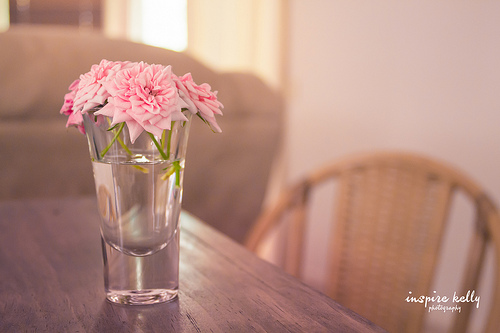

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

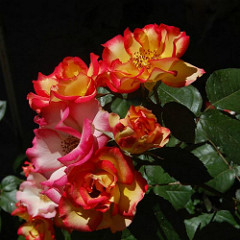

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
np.array(PIL.Image.open(str(roses[1]))).shape

(240, 240, 3)

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
preprocessed_images = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  #color_mode='grayscale',
  #crop_to_aspect_ratio=True,
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
class_names = preprocessed_images.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


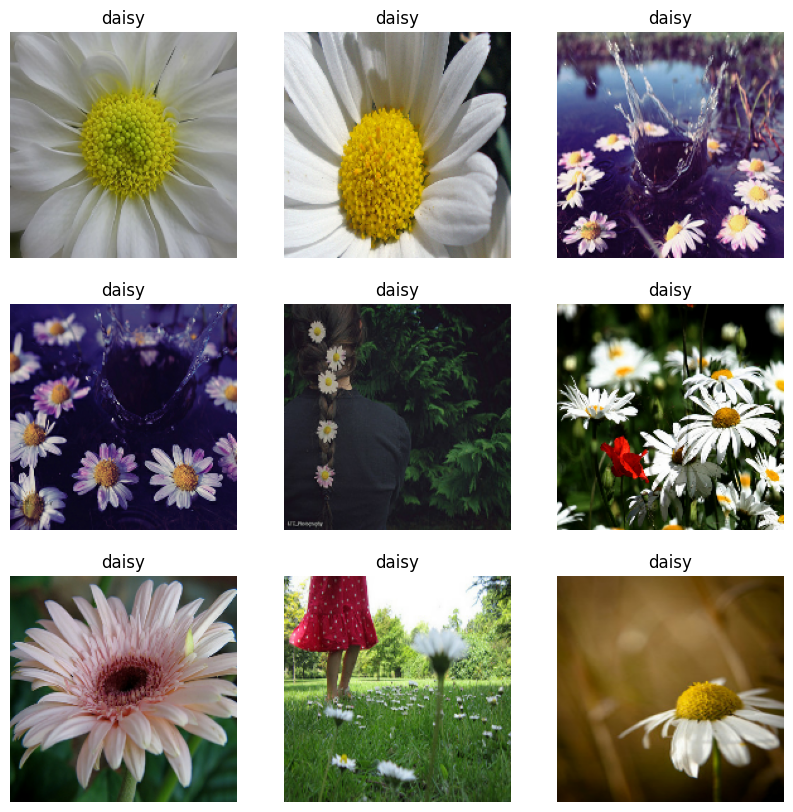

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in preprocessed_images.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for images, labels in preprocessed_images.take(1):
  for i in range(9):
    print(images[i].numpy().shape)

(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)


### Object Detection

For this segment of the tutorial, we will attempt to use Pytorch Vision to demonstrate object detection.

In [ ]:
import torch
import torchvision
from torchvision.models.detection.mask_rcnn import MaskRCNN_ResNet50_FPN_V2_Weights, maskrcnn_resnet50_fpn_v2

In [ ]:
model = maskrcnn_resnet50_fpn_v2(weights=MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT)

# Set the model to evaluation mode
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

In [ ]:
for images, labels in preprocessed_images.take(1):
  for i in range(8):
    image = images[i].numpy().astype("uint8")

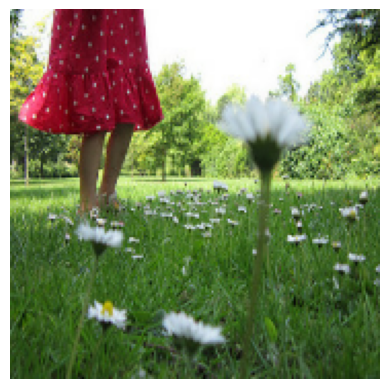

In [ ]:
plt.axis('off')
plt.imshow(image)

In [ ]:
img_tensor = torch.tensor(image).permute(2, 0, 1).float() / 255.0
img_list = [img_tensor]

In [ ]:
with torch.no_grad():
    prediction = model(img_list)

In [ ]:
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']
scores = prediction[0]['scores']
masks = prediction[0]['masks']

In [ ]:
import cv2

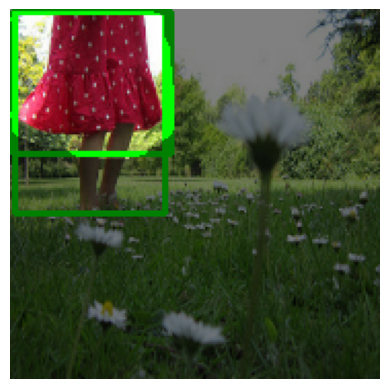

In [ ]:
for i in range(len(boxes)):
    box = boxes[i].detach().numpy().astype(int)
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

    mask = masks[i].detach().cpu().numpy().squeeze()
    mask = np.array(mask * 255, dtype=np.uint8)
    mask_color = np.random.randint(0, 255, 3)
    mask_color = (mask_color[0], mask_color[1], mask_color[2])
    masked_img = cv2.bitwise_and(image, image, mask=mask)
    masked_img = cv2.addWeighted(masked_img, 0.5, image, 0.5, 0)
    plt.imshow(masked_img)

plt.axis('off')
plt.show()

### Training your own **model**

#### Self Annoted **Datasets**

In [ ]:
import pathlib

import torch
import torch.utils.data

from torchvision import models, datasets, tv_tensors
from torchvision.transforms import v2

torch.manual_seed(0)

# This loads fake data for illustration purposes of this example. In practice, you'll have
# to replace this with the proper data.
# If you're trying to run that on Colab, you can download the assets and the
# helpers from https://github.com/pytorch/vision/tree/main/gallery/
ROOT = pathlib.Path("../assets") / "coco"
IMAGES_PATH = str(ROOT / "images")
ANNOTATIONS_PATH = str(ROOT / "instances.json")
from helpers import plot
print(ROOT)
print(IMAGES_PATH)

../assets/coco
../assets/coco/images


Loading the dataset

In [ ]:
dataset = datasets.CocoDetection(IMAGES_PATH, ANNOTATIONS_PATH)

sample = dataset[0]
img, target = sample
print(f"{type(img) = }\n{type(target) = }\n{type(target[0]) = }\n{target[0].keys() = }")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
type(img) = <class 'PIL.Image.Image'>
type(target) = <class 'list'>
type(target[0]) = <class 'dict'>
target[0].keys() = dict_keys(['segmentation', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])


Convert the dataset into machine learning ready dataset

In [ ]:
dataset = datasets.wrap_dataset_for_transforms_v2(dataset, target_keys=("boxes", "labels", "masks"))

sample = dataset[0]
img, target = sample
print(f"{type(img) = }\n{type(target) = }\n{target.keys() = }")
print(f"{type(target['boxes']) = }\n{type(target['labels']) = }\n{type(target['masks']) = }")

type(img) = <class 'PIL.Image.Image'>
type(target) = <class 'dict'>
target.keys() = dict_keys(['boxes', 'masks', 'labels'])
type(target['boxes']) = <class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'>
type(target['labels']) = <class 'torch.Tensor'>
type(target['masks']) = <class 'torchvision.tv_tensors._mask.Mask'>


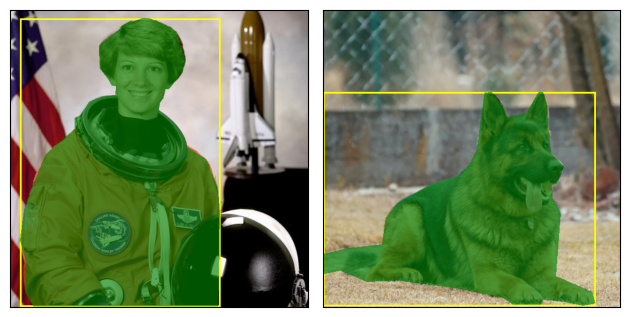

In [ ]:
plot([dataset[0], dataset[1]])

Applying preprocessing steps

In [ ]:
transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomPhotometricDistort(p=1),
        v2.RandomZoomOut(fill={tv_tensors.Image: (123, 117, 104), "others": 0}),
        v2.RandomIoUCrop(),
        v2.RandomHorizontalFlip(p=1),
        v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
    ]
)

dataset = datasets.CocoDetection(IMAGES_PATH, ANNOTATIONS_PATH, transforms=transforms)
dataset = datasets.wrap_dataset_for_transforms_v2(dataset, target_keys=["boxes", "labels", "masks"])

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


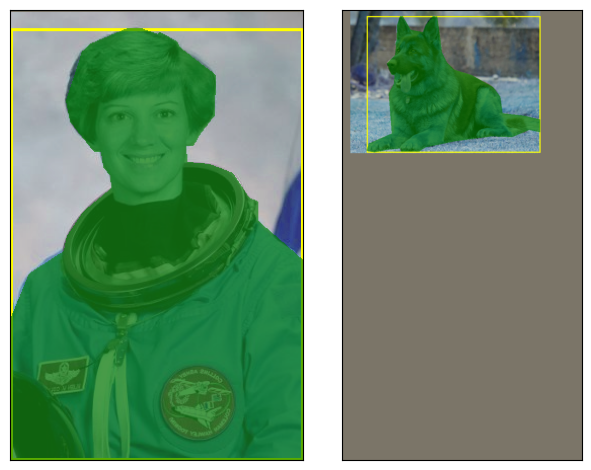

In [ ]:
plot([dataset[0], dataset[1]])

##### Training


load model in training mode

In [ ]:
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    # We need a custom collation function here, since the object detection
    # models expect a sequence of images and target dictionaries. The default
    # collation function tries to torch.stack() the individual elements,
    # which fails in general for object detection, because the number of bounding
    # boxes varies between the images of the same batch.
    collate_fn=lambda batch: tuple(zip(*batch)),
)

model = models.get_model("maskrcnn_resnet50_fpn_v2", weights=None, weights_backbone=None).train()

In [ ]:
for imgs, targets in data_loader:
    loss_dict = model(imgs, targets)
    # Put your training logic here

    print(f"{[img.shape for img in imgs] = }")
    print(f"{[type(target) for target in targets] = }")
    for name, loss_val in loss_dict.items():
        print(f"{name:<20}{loss_val:.3f}")

[img.shape for img in imgs] = [torch.Size([3, 512, 512]), torch.Size([3, 409, 493])]
[type(target) for target in targets] = [<class 'dict'>, <class 'dict'>]
loss_classifier     4.721
loss_box_reg        0.006
loss_mask           0.734
loss_objectness     0.691
loss_rpn_box_reg    0.036


**How can I annotate my own dataset?**


You can annotate your dataset from [here](https://annotate.pixlab.io/)

You can also quickly train your own model interactively from [here](https://teachablemachine.withgoogle.com/train/image)

#### Model Annoted Datasets

In [ ]:
!wget "https://i.ibb.co/xz14HPG/ff5b0ccc9d80b4ca-jpg-rf-2o3y0lx-Hb6w-T4iz-Sg-Ibb.jpg" -O bikes.jpg

--2024-11-21 07:48:41--  https://i.ibb.co/xz14HPG/ff5b0ccc9d80b4ca-jpg-rf-2o3y0lx-Hb6w-T4iz-Sg-Ibb.jpg
Resolving i.ibb.co (i.ibb.co)... 169.197.85.95
Connecting to i.ibb.co (i.ibb.co)|169.197.85.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38080 (37K) [image/jpeg]
Saving to: ‘bikes.jpg’

bikes.jpg           100%[===================>]  37.19K  --.-KB/s    in 0.05s   

2024-11-21 07:48:42 (761 KB/s) - ‘bikes.jpg’ saved [38080/38080]



Install facebooks segment anything package.

In [ ]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-91uogj98
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-91uogj98
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=2a61070b3eb7d62655284803dc92e5973f92caa8c9c00a5b02363d7c6adbb16b
  Stored in directory: /tmp/pip-ephem-wheel-cache-d318hxh4/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


Download the VIT_B model (smallest) for low resourced computers and quick results.

In [ ]:
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

In [ ]:
CHECKPOINT_PATH='/content/sam_vit_b_01ec64.pth'

In [ ]:
import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_b"

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

In [ ]:
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [ ]:
mask_predictor = SamPredictor(sam)

In [ ]:
import cv2
IMAGE_PATH= '/content/bikes.jpg'
image= cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(image_rgb)

In [ ]:
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

In [ ]:
input_point =  np.array([[250,200]])
input_label = np.array([1])

In [ ]:
masks, scores, logits = mask_predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True
)

In [ ]:
def show_output(result_dict,axes=None):
     if axes:
        ax = axes
     else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
     for mask in masks:
        img = np.ones((mask.shape[0], mask.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
            ax.imshow(np.dstack((img, mask*0.5)))

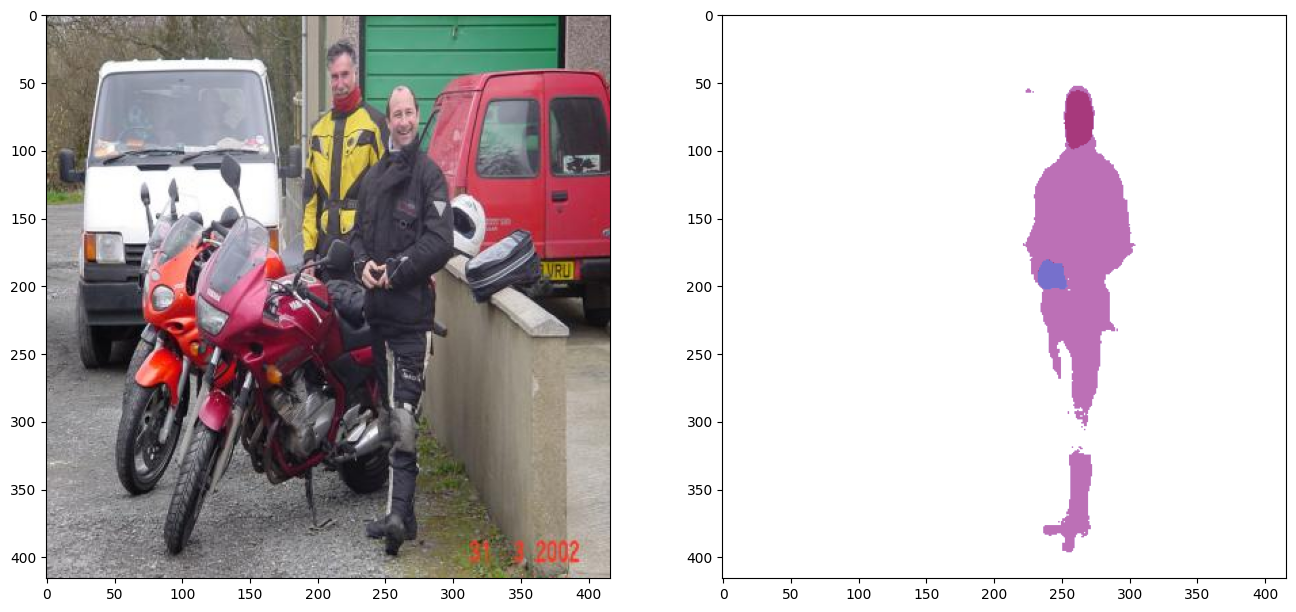

In [ ]:
_,axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(image_rgb)
show_output(masks, axes[1])

### Image Generation